# Relations distribution

In [1]:
import collections

FILE = '../Data/gs_tsv/subtask2_gs.tsv'

In [2]:
# {doc_id: {'LivingStatus': [(fm, 0-4)],
#           'Observation': [(fm, disease)]
#          }
# }
relations = collections.defaultdict(dict)
with open(FILE, 'r') as f:
    for line in f.readlines():
        doc_id, fm, _, relation, content = line.strip('\n').split('\t')
        relations[doc_id][relation] = relations.get(doc_id, {}).get(relation, []) + [(fm, content)]
for doc_id in relations:
    print(relations[doc_id], '\n')

{'LivingStatus': [('Son', '4'), ('Daughter', '4'), ('Brother', '4'), ('Father', '4'), ('Grandfather', '0')], 'Observation': [('Uncle', 'ovarian failure'), ('Cousin', ' phaeochromocytoma'), ('Cousin', 'choreic dysphonia'), ('Mother', 'disorders of meninges'), ('Mother', 'bile duct adenocarcinoma'), ('Mother', 'neoplasm maligprostate '), ('Mother', 'lump of skin'), ('Father', 'men ii'), ('Grandfather', 'ear melanoma')]} 

{'LivingStatus': [('Son', '4'), ('Brother', '4'), ('Sister', '4'), ('Mother', '4'), ('Father', '4')], 'Observation': [('Sister', 'hypermnesia')]} 

{'Observation': [('Mother', 'umbilical cord anomaly'), ('Father', 'hypertension'), ('Father', 'drug overdose'), ('Aunt', 'vulvar sarcoma'), ('Aunt', 'gene mutation'), ('Grandmother', 'hypothyroidism'), ('Grandfather', 'hyperthermia')]} 

{'Observation': [('Daughter', 'genetic disease'), ('Aunt', 'nalbuphine allergy'), ('Aunt', 'miscarriages'), ('Cousin', 'schizophrenia')]} 

{'LivingStatus': [('Grandmother', '0')], 'Observat

In [3]:
from collections import Counter
obs_nums = {} # {obs_number_in_a_file: frequency_of_this_number}
for doc_id in relations:
    obs_count = len(relations.get(doc_id).get('Observation', []))
    obs_nums[obs_count] = obs_nums.get(obs_count, 0) + 1
print(obs_nums)

total_relationship_num, total_doc_num = 0, 0
for num_of_rela, freq in obs_nums.items():
    total_relationship_num += num_of_rela * freq
    total_doc_num += freq
print('The total number of relationship in all docs is:', total_relationship_num)
print('The avg number of relationship in all docs is:', total_relationship_num/total_doc_num)

{9: 6, 1: 8, 7: 5, 4: 8, 19: 1, 10: 4, 3: 9, 11: 8, 2: 9, 14: 4, 5: 8, 0: 4, 12: 3, 8: 4, 16: 1, 17: 3, 20: 1, 6: 3, 15: 4, 18: 2, 13: 2, 27: 1}
The total number of relationship in all docs is: 739
The avg number of relationship in all docs is: 7.540816326530612


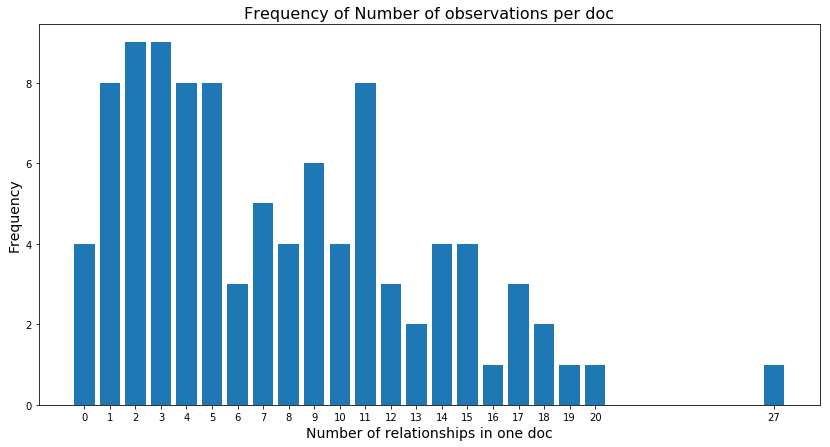

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,7))
plt.bar(list(obs_nums.keys()), list(obs_nums.values()), tick_label=list(obs_nums.keys()))
plt.title('Frequency of Number of observations per doc', fontsize=16)
plt.xlabel('Number of relationships in one doc', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Distance of entities in relations

In [5]:
import pickle as pkl
from os.path import join

DIR = '../objects'

with open(join(DIR, 'sents.pkl'), 'rb') as pkl_f:
    sents = pkl.load(pkl_f)

In [6]:
def get_sent_id_of_ent(sents, ent):
    ids = []
    for i in range(len(sents)):
        if ent in sents[i]:
            ids.append(i)
    return ids

def min_dist_of_lists(l1, l2):
    dists = [abs(d1 - d2) for d1 in l1 for d2 in l2]
    return min(dists) if dists else -1

min_dist_freqs = {} # {dist: freq}
#for doc_id, doc_relations in relation_not_in_a_sent.items():
for doc_id, doc_relations in relations.items():
    doc_sents = list(map(lambda sent: sent.lower(), sents[doc_id]))
    for relation in doc_relations.get('Observation', []):
        fm_sent_ids = get_sent_id_of_ent(doc_sents, relation[0].lower())
        obs_sent_ids = get_sent_id_of_ent(doc_sents, relation[1].lower())
        dist = min_dist_of_lists(fm_sent_ids, obs_sent_ids)
        min_dist_freqs[dist] = min_dist_freqs.get(dist, 0) + 1
print(min_dist_freqs)

{0: 522, 1: 110, 2: 33, 3: 22, -1: 47, 6: 2, 7: 2, 5: 1}


70.63599458728011%
522 out of 739 relations are inside one sentence.


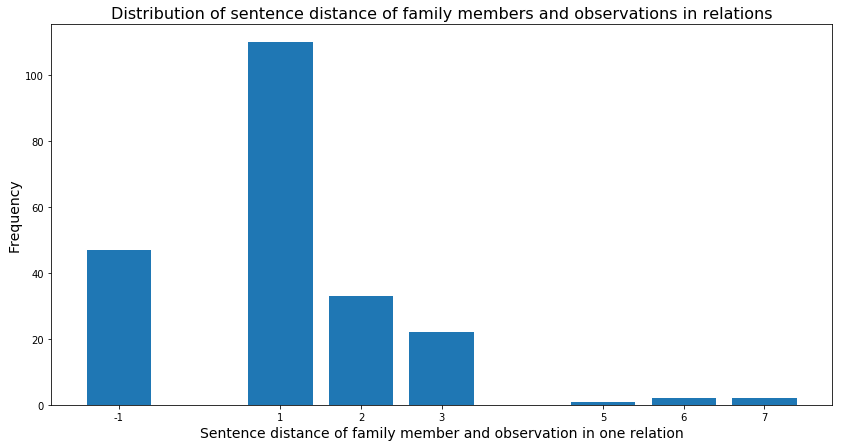

In [7]:
print(str(min_dist_freqs[0] / total_relationship_num * 100) + "%")
print(str(min_dist_freqs[0]) + " out of " + str(total_relationship_num) + " relations are inside one sentence.")
plt.figure(figsize=(14,7))
dist_of_relation_not_in_a_sent = min_dist_freqs.pop(0)
plt.bar(list(min_dist_freqs.keys()), list(min_dist_freqs.values()), tick_label=list(min_dist_freqs.keys()))
plt.title('Distribution of sentence distance of family members and observations in relations', fontsize=16)
plt.xlabel('Sentence distance of family member and observation in one relation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

| in one sentence | adjacent sentences | one sent in between | two sents in between | total |
|----|:---:|:---:|:---:|:---:|
|522(70.64%) | (110)14.88% | (33)4.47% | (22)2.98% | (687)92.96% |

There are also 40/739 = 6.36% relationships can't directly find from original texts.